In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_descriptor = pd.read_csv('descriptor_data-CTE.csv')
df_descriptor = df_descriptor.drop(['Unnamed: 0', 'index', 'SPS.1'], axis=1)
df_descri

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.854852,12.854852,0.116999,-0.561307,0.502868,11.448276,400.415,388.319,400.051778,140,...,0,0,0,0,0,0,0,0,0,0
1,13.002540,13.002540,0.126068,-0.553894,0.472528,12.551724,380.359,368.263,380.079707,138,...,0,0,0,0,0,0,0,0,0,0
2,13.148545,13.148545,0.204808,-0.494438,0.408909,13.944444,476.444,460.316,476.100836,174,...,0,0,0,0,0,0,0,0,0,0
3,12.860061,12.860061,0.120332,-0.558552,0.517032,11.448276,382.375,368.263,382.095357,140,...,0,0,0,0,0,0,0,0,0,0
4,12.484110,12.484110,0.124826,-0.554435,0.550672,11.454545,292.250,284.186,292.048407,106,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,14.601129,14.601129,0.009189,-5.135530,0.092764,14.064516,870.692,850.532,870.074285,310,...,0,0,1,0,0,0,0,0,0,0
508,14.792489,14.792489,0.057715,-6.071254,0.205024,14.695652,637.492,620.356,637.107240,232,...,0,0,0,0,0,0,0,0,0,0
509,14.851608,14.851608,0.047353,-6.234494,0.170823,14.860000,705.489,689.361,705.094625,256,...,0,0,0,0,0,0,0,0,0,0
510,14.842119,14.842119,0.008068,-6.208546,0.170823,14.860000,705.489,689.361,705.094625,256,...,0,0,0,0,0,0,0,0,0,0


In [2]:
target_values = pd.read_excel('PI-CTE.xlsx')
target_values = target_values['CTE (ppm/K)']

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = MinMaxScaler()
df_descriptor_s = std.fit_transform(df_descriptor)

In [4]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

sel = VarianceThreshold(threshold=0.01)
X_sel = sel.fit_transform(df_descriptor_s)
feature_index = sel.get_support()

selected_columns = df_descriptor.columns[feature_index]

X_sel_df = pd.DataFrame(X_sel, columns=selected_columns)

print('number of features after remove redundant ones:', sum(feature_index))

number of features after remove redundant ones: 144


In [6]:
X = df_descriptor
y = target_values

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf = rf.fit(X_sel_df, y)
sfm = SelectFromModel(estimator=rf, prefit=True, max_features=30)
X_sfm = sfm.transform(X_sel_df)
print(X_sfm.shape)

(512, 18)


D:\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [9]:
feature_index = sfm.get_support()
selected_columns = X_sel_df.columns[feature_index]
X_sfm = pd.DataFrame(X_sfm, columns=selected_columns)
X_sfm

,MinAbsEStateIndex,SPS,MinPartialCharge,MaxAbsPartialCharge,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,Kappa3,SMR_VSA5,SMR_VSA9,SlogP_VSA11,SlogP_VSA8,EState_VSA4,EState_VSA9,MolLogP
0,0.260055,0.009210,0.999873,0.000000,1.445323e-01,0.007465,0.861004,0.247648,0.996196,0.602720,0.149387,0.068696,0.084251,0.000000,0.299054,0.171349,0.000000,0.131852
1,0.280279,0.044210,0.999873,0.000000,2.921700e-07,0.069189,0.840772,0.000152,0.995501,0.595512,0.060679,0.045050,0.249080,0.000000,0.421245,0.330313,0.000000,0.096302
2,0.455880,0.088384,0.230078,0.769893,2.929845e-03,0.326099,0.637910,0.045117,0.294512,0.335845,0.247403,0.000000,0.340683,0.497179,0.000000,0.058476,0.285714,0.277482
3,0.267489,0.009210,0.999873,0.000000,2.226368e-07,0.006764,0.850482,0.000023,0.996029,0.602720,0.138003,0.045050,0.084251,0.000000,0.299054,0.197524,0.000000,0.097504
4,0.277509,0.009409,0.999873,0.000000,5.828671e-16,0.000000,1.000000,0.000000,0.998624,1.000000,0.000000,0.000000,0.084251,0.000000,0.299054,0.054504,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.019625,0.092192,0.233655,0.766316,1.450861e-01,0.399041,0.538941,0.237993,0.118076,0.192233,0.604103,0.155365,0.340683,0.497179,0.240920,0.796358,0.418929,0.530619
508,0.127844,0.112211,0.845865,0.557639,2.948771e-02,0.915559,0.122831,0.045155,0.001758,0.442485,0.359501,0.124662,0.000000,0.000000,0.000000,0.000000,0.000000,0.343580
509,0.104735,0.117423,0.845938,0.590756,2.950731e-02,0.916303,0.122805,0.045495,0.001752,0.488874,0.435327,0.167996,0.000000,0.000000,0.000000,0.072396,0.000000,0.406024
510,0.017125,0.117423,0.848588,0.590656,2.950730e-02,0.916059,0.122827,0.045221,0.001752,0.480351,0.435327,0.167996,0.000000,0.000000,0.000000,0.144792,0.000000,0.406024


In [30]:
X_sfm = df_descriptor[['MinAbsEStateIndex', 'SPS', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'BCUT2D_MWHI', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BalabanJ', 'Kappa3', 'SMR_VSA5',
       'SMR_VSA9', 'SlogP_VSA11', 'SlogP_VSA8', 'EState_VSA9', 'MolLogP']]
X_sfm

,MinAbsEStateIndex,SPS,MinPartialCharge,MaxAbsPartialCharge,BCUT2D_MWHI,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BalabanJ,Kappa3,SMR_VSA5,SMR_VSA9,SlogP_VSA11,SlogP_VSA8,EState_VSA9,MolLogP
0,0.116999,11.448276,-0.288136,0.288136,32.166580,2.175225,-2.038335,2.274092,-2.227353,7.989994,1.630639,2.746323,9.790967,5.687386,0.000000,27.232283,0.000000,2.5794
1,0.126068,12.551724,-0.288136,0.288136,16.158971,2.212615,-2.047750,2.366214,-2.229835,5.975685,1.619710,1.998279,6.420822,16.814289,0.000000,38.359186,0.000000,1.9994
2,0.204808,13.944444,-0.457382,0.457382,16.483433,2.368240,-2.142155,2.339194,-2.287043,6.341646,1.226015,3.572863,0.000000,22.998047,22.998047,0.000000,9.473726,4.9554
3,0.120332,11.448276,-0.288136,0.288136,16.158963,2.174801,-2.043231,2.163770,-2.228107,5.974639,1.630639,2.650327,6.420822,5.687386,0.000000,27.232283,0.000000,2.0190
4,0.124826,11.454545,-0.288136,0.288136,16.158938,2.170703,-1.973650,2.146213,-2.226586,5.974451,2.232979,1.486588,0.000000,5.687386,0.000000,27.232283,0.000000,0.4282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.009189,14.064516,-0.456595,0.456595,32.227920,2.412425,-2.188212,2.429985,-2.292767,7.911413,1.008275,6.580818,22.143564,22.998047,22.998047,21.938489,13.890877,9.0854
508,0.057715,14.695652,-0.321996,0.410722,19.424843,2.725309,-2.381856,2.565730,-2.545221,6.341952,1.387697,4.518160,17.767588,0.000000,0.000000,0.000000,0.000000,6.0338
509,0.047353,14.860000,-0.321980,0.418002,19.427014,2.725760,-2.381868,2.567569,-2.545226,6.344726,1.458030,5.157572,23.943886,0.000000,0.000000,0.000000,0.000000,7.0526
510,0.008068,14.860000,-0.321398,0.417980,19.427013,2.725612,-2.381858,2.566923,-2.545222,6.342496,1.445109,5.157572,23.943886,0.000000,0.000000,0.000000,0.000000,7.0526


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
X_train.shape, X_test.shape

((409, 18), (103, 18))

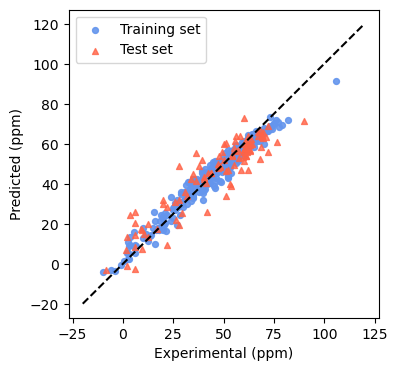

In [34]:
import matplotlib.pyplot as plt

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

plt.figure(figsize=(4,4))
plt.scatter(y_train, y_pred_train_rf, alpha=0.9, label='Training set', color='cornflowerblue', marker='o', s=18)  # Set color to cornflowerblue
plt.scatter(y_test, y_pred_test_rf, alpha=0.8, label='Test set', color='tomato', marker='^', s=18)  # Set color to tomato
plt.plot([-20, 120], [-20, 120], 'k--')
plt.legend()
plt.xlabel('Experimental (ppm)')
plt.ylabel('Predicted (ppm)')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, make_scorer

print('training R = %.3f' % np.sqrt(r2_score(y_train, rf.predict(X_train))))
print('training R2 = %.3f' % r2_score(y_train, rf.predict(X_train)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print('training MAE = %.3f' %mean_absolute_error(y_train, rf.predict(X_train)))

print('test R = %.3f' % np.sqrt(r2_score(y_test, rf.predict(X_test))))
print('test R2 = %.3f' % r2_score(y_test, rf.predict(X_test)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))
print('test MAE = %.3f' %mean_absolute_error(y_test, rf.predict(X_test)))

training R = 0.979
training R2 = 0.958
training RMSE = 3.531
training MAE = 2.662
test R = 0.922
test R2 = 0.849
test RMSE = 8.441
test MAE = 6.570


In [15]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                        
r2_scores_rf = cross_val_score(rf, X_sfm, y, scoring='r2', cv=crossvalidation)
rmse_scores_rf = cross_val_score(rf, X_sfm,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
mae_scores_rf = cross_val_score(rf, X_sfm, y, scoring=make_scorer(mean_absolute_error), cv=crossvalidation)

print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_rf), np.sqrt(r2_scores_rf.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_rf), r2_scores_rf.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_rf), -rmse_scores_rf.mean()))
print('Folds:%i, mean MAE: %.3f' %(len(mae_scores_rf), mae_scores_rf.mean()))

Cross-Validation Results:
Folds:10, mean R: 0.873
Folds:10, mean R2: 0.762
Folds:10, mean RMSE: 8.515
Folds:10, mean MAE: 6.541


In [16]:
std_error_r = np.std(np.sqrt(r2_scores_rf))
print("R的误差范围：%.3f" %(std_error_r))
std_error_r2 = np.std(r2_scores_rf)
print("R2的误差范围：%.3f" %(std_error_r2))
std_error_rmse = np.std(rmse_scores_rf)
print("RMSE的误差范围：%.3f" %(std_error_rmse))
std_error_mae = np.std(mae_scores_rf)
print("MAE的误差范围：%.3f" %(std_error_mae))

R的误差范围：0.045
R2的误差范围：0.076
RMSE的误差范围：0.566
MAE的误差范围：0.498


# 超参数搜索

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': list(range(100, 450, 50)),  
    'max_depth': [12, 13, 15, 16],  
    'min_samples_split': [1, 2, 4],
    'min_samples_leaf': [1,2, 4],
    'max_features':['sqrt', 'log2', 3, 6, 7, 8]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("最佳参数:", grid_search.best_params_)

最佳参数: {'max_depth': 16, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 150}


In [26]:
best_rf3 = grid_search.best_estimator_
y_pred = best_rf3.predict(X_test)

print('test R = %.3f' % np.sqrt(r2_score(y_test, y_pred)))
print('test R2 = %.3f' % r2_score(y_test, y_pred))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                      
r2_scores_rf = cross_val_score(best_rf3, X_sfm, y, scoring='r2', cv=crossvalidation)
rmse_scores_rf = cross_val_score(best_rf3, X_sfm,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_rf), np.sqrt(r2_scores_rf.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_rf), r2_scores_rf.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_rf), -rmse_scores_rf.mean()))

test R = 0.922
test R2 = 0.851
test RMSE = 8.402
Cross-Validation Results:
Folds:10, mean R: 0.873
Folds:10, mean R2: 0.762
Folds:10, mean RMSE: 8.393


# 最优模型

In [36]:
best_rf = RandomForestRegressor(max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=150, max_features=8)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, max_features=8, min_samples_split=1,
                      n_estimators=150)

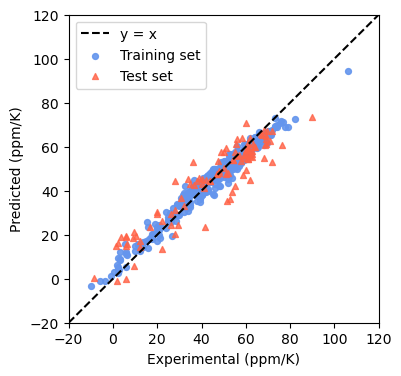

In [40]:
import matplotlib.pyplot as plt

y_pred_train_rf = best_rf.predict(X_train)
y_pred_test_rf = best_rf.predict(X_test)

plt.figure(figsize=(4,4))
plt.plot([-20, 120], [-20, 120], 'k--', label = 'y = x')
plt.scatter(y_train, y_pred_train_rf, alpha=0.9, label='Training set', color='cornflowerblue', marker='o', s=18)  # Set color to cornflowerblue
plt.scatter(y_test, y_pred_test_rf, alpha=0.8, label='Test set', color='tomato', marker='^', s=18)  # Set color to tomato
plt.xlim(-20, 120)
plt.ylim(-20, 120)
plt.legend()
plt.xlabel('Experimental (ppm/K)')
plt.ylabel('Predicted (ppm/K)')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, make_scorer

print('training R = %.3f' % np.sqrt(r2_score(y_train, best_rf.predict(X_train))))
print('training R2 = %.3f' % r2_score(y_train, best_rf.predict(X_train)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, best_rf.predict(X_train))))
print('training MAE = %.3f' %mean_absolute_error(y_train, best_rf.predict(X_train)))

print('test R = %.3f' % np.sqrt(r2_score(y_test, best_rf.predict(X_test))))
print('test R2 = %.3f' % r2_score(y_test, best_rf.predict(X_test)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, best_rf.predict(X_test))))
print('tes MAE = %.3f' %mean_absolute_error(y_test, best_rf.predict(X_test)))

training R = 0.981
training R2 = 0.962
training RMSE = 3.378
training MAE = 2.630
test R = 0.925
test R2 = 0.855
test RMSE = 8.275
tes MAE = 6.582


In [42]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                        
r2_scores_rf = cross_val_score(best_rf, X_sfm, y, scoring='r2', cv=crossvalidation)
rmse_scores_rf = cross_val_score(best_rf, X_sfm,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
mae_scores_rf = cross_val_score(best_rf, X_sfm, y, scoring=make_scorer(mean_absolute_error), cv=crossvalidation)

print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_rf), np.sqrt(r2_scores_rf.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_rf), r2_scores_rf.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_rf), -rmse_scores_rf.mean()))
print('Folds:%i, mean MAE: %.3f' %(len(mae_scores_rf), mae_scores_rf.mean()))

Cross-Validation Results:
Folds:10, mean R: 0.875
Folds:10, mean R2: 0.766
Folds:10, mean RMSE: 8.403
Folds:10, mean MAE: 6.524


In [43]:
std_error_r = np.std(np.sqrt(r2_scores_rf))
print("R的误差范围：%.3f" %(std_error_r))
std_error_r2 = np.std(r2_scores_rf)
print("R2的误差范围：%.3f" %(std_error_r2))
std_error_rmse = np.std(rmse_scores_rf)
print("RMSE的误差范围：%.3f" %(std_error_rmse))
std_error_mae = np.std(mae_scores_rf)
print("MAE的误差范围：%.3f" %(std_error_mae))

R的误差范围：0.053
R2的误差范围：0.088
RMSE的误差范围：0.747
MAE的误差范围：0.640


In [49]:
import joblib

joblib.dump(best_rf, 'best_rf.pkl')

best_rf = joblib.load('best_rf.pkl')

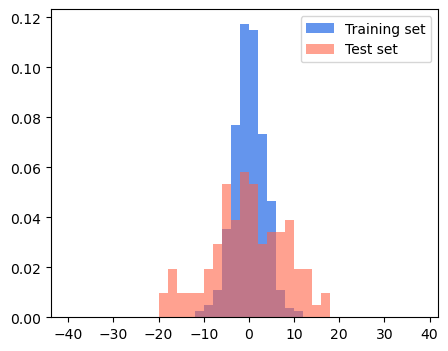

In [44]:
plt.figure(figsize=(5, 4))
plt.hist(best_rf.predict(X_train)-y_train, color='cornflowerblue',
         bins=np.arange(-40, 40, 2), density=True, label= 'Training set' )
plt.hist(best_rf.predict(X_test)-y_test, color='tomato',
         bins=np.arange(-40, 40, 2), density=True, alpha=0.6, label= 'Test set' )

plt.legend()
plt.show()

In [34]:
import shap
shap.initjs()  

In [35]:
explainer = shap.TreeExplainer(best_rf)

In [37]:
shap_values = explainer.shap_values(X_sfm) 

shap_values2 = explainer(X_sfm) 

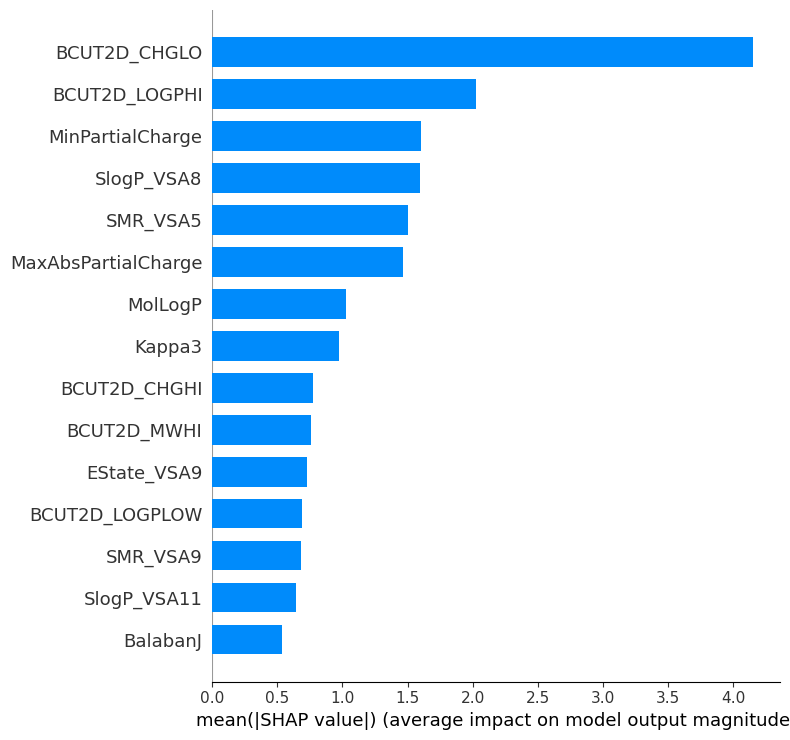

In [38]:
shap.summary_plot(shap_values, X_sfm, plot_type="bar", max_display=15, show=False)

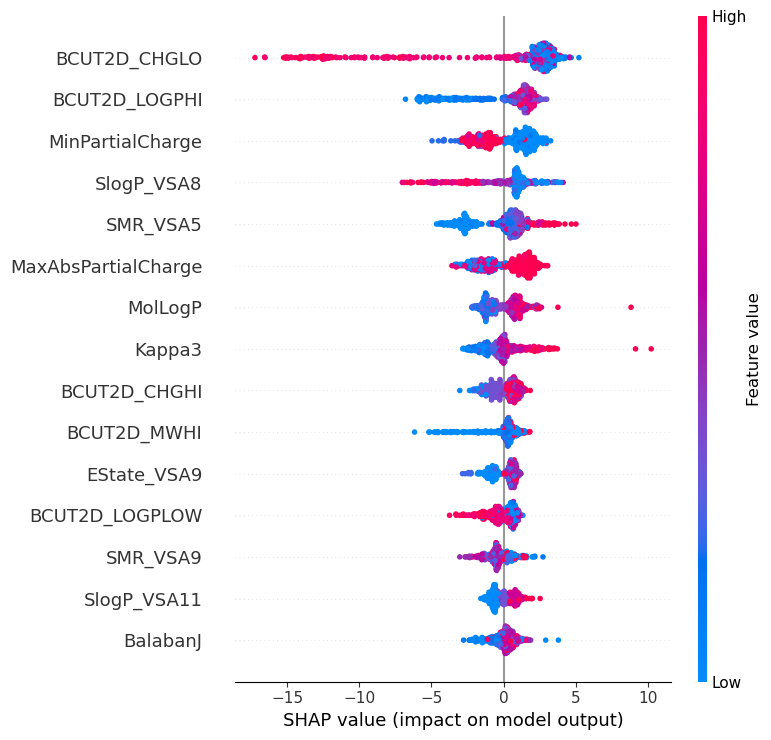

In [39]:
shap.summary_plot(shap_values, X_sfm, show=False, max_display=15)

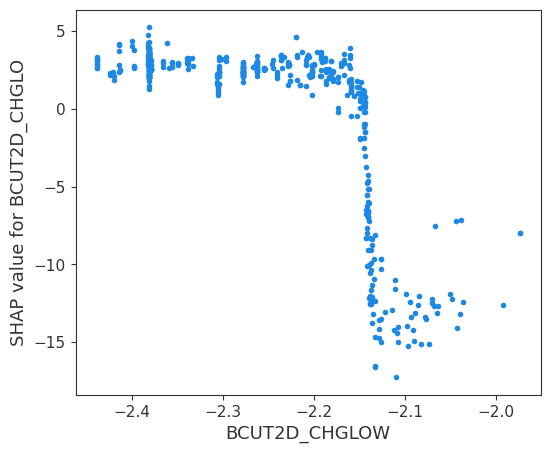

In [46]:
import shap
import matplotlib.pyplot as plt

shap.dependence_plot('BCUT2D_CHGLO', shap_values, X_sfm, interaction_index=None, show=False)

plt.xlabel('BCUT2D_CHGLOW')
plt.ylabel('SHAP value for BCUT2D_CHGLO')

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

In [47]:
import shap  
import pandas as pd  

shap_values = shap_values[:, X_sfm.columns.get_loc('BCUT2D_CHGLO')]  
feature_values = X_sfm['BCUT2D_CHGLO']  

data_to_save = pd.DataFrame({  
    'Feature Value': feature_values,  
    'SHAP Value': shap_values  
})  

data_to_save.to_csv('shap_dependence_data.csv', index=False)